In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import pickle
from joblib import dump, load

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

from tensorflow.keras import Sequential, callbacks
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, Dropout, Activation

pd.set_option('display.max_rows',30)
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv('sample_clean.csv')
df['Year'].value_counts()

2020    4000
2019    4000
2018    4000
2017    4000
Name: Year, dtype: int64

In [3]:
df_simple = df.copy()
df_simple2 = df.copy()

In [4]:
df_simple2['Year'] = df_simple2['Year'].apply(lambda x:x+1)


In [5]:
df['Year'].value_counts()

2020    4000
2019    4000
2018    4000
2017    4000
Name: Year, dtype: int64

In [6]:
combined = pd.merge(df_simple, df_simple2, on=['ADDRESS', 'Year'], how = 'inner')
#combined = combined[combined['Year']<2021]

In [7]:
combined

,ADDRESS,ASSESSED_VALUE_x,ASSESSMENT_CLASS_x,ASSESSMENT_CLASS_DESCRIPTION_x,COMM_CODE_x,COMM_NAME_x,LATITUDE_x,LONGITUDE_x,ROLL_NUMBER_x,Year,...,inc2_y,inc3_y,inc4_y,own1_y,own2_y,own3_y,own4_y,lab1_y,lab2_y,lab3_y
0,4 SADDLEMEAD RD NE,345500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2018,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
1,4 SADDLEMEAD RD NE,323500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2019,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
2,4 SADDLEMEAD RD NE,315500.0,RE,Residential,SAD,SADDLE RIDGE,51.126759,-113.944253,4017208,2020,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
3,70 SADDLEBACK RD NE,397000.0,RE,Residential,SAD,SADDLE RIDGE,51.128774,-113.948804,4034203,2018,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
4,70 SADDLEBACK RD NE,390000.0,RE,Residential,SAD,SADDLE RIDGE,51.128774,-113.948804,4034203,2019,...,44610,30445,87555,85.1,26.2,7.8,0.749317,72.1,9.9,0.273286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11992,40 CRANFIELD PL SE,524000.0,RE,Residential,CRA,CRANSTON,50.890842,-113.977871,792034001,2019,...,24550,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717
11993,40 CRANFIELD PL SE,493000.0,RE,Residential,CRA,CRANSTON,50.890842,-113.977871,792034001,2020,...,24550,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717
11994,167 CRANWELL CL SE,644000.0,RE,Residential,CRA,CRANSTON,50.890260,-113.985099,792038804,2018,...,24550,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717
11995,167 CRANWELL CL SE,679000.0,RE,Residential,CRA,CRANSTON,50.890260,-113.985099,792038804,2019,...,24550,59829,131886,89.1,16.8,1.2,0.881319,82.8,7.4,0.155717


In [8]:

combined['saf1_p'] = (combined['saf1_x'] - combined['saf1_y']) / combined['saf1_y']
combined['saf2_p'] = (combined['saf2_x'] - combined['saf2_y']) / combined['saf2_y']
combined['saf3_p'] = (combined['saf3_x'] - combined['saf3_y']) / combined['saf3_y']
combined['saf4_p'] = (combined['saf4_x'] - combined['saf4_y']) / combined['saf4_y']
combined['saf5_p'] = (combined['saf5_x'] - combined['saf5_y']) / combined['saf5_y']
combined['saf6_p'] = (combined['saf6_x'] - combined['saf6_y']) / combined['saf6_y']
combined['saf7_p'] = (combined['saf7_x'] - combined['saf7_y']) / combined['saf7_y']
combined['saf8_p'] = (combined['saf8_x'] - combined['saf8_y']) / combined['saf8_y']
ls = ['inc1', 'inc2', 'inc3', 'inc4', 'own1', 'own2', 'own3', 'own4', 'lab1', 'lab2']
#listy = ['inc1_y', 'inc2_y', 'inc3_y', 'inc4_y', 'own1_y', 'own2_y', 'own3_y', 'own4_y', 'lab1_y', 'lab2_y']
#listp = ['inc1_p', 'inc2_p', 'inc3_p', 'inc4_p', 'own1_p', 'own2_p', 'own3_p', 'own4_p', 'lab1_p', 'lab2_p']
for i in range(10):
    combined[ls[i]+'_p'] = (combined[ls[i]+'_x'] - combined[ls[i]+'_y'])/(combined[ls[i]+'_y'])


In [9]:
for xxx in ls:
    print(combined[xxx+'_p'].describe())

count    11997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: inc1_p, dtype: float64
count    11997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: inc2_p, dtype: float64
count    11997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: inc3_p, dtype: float64
count    11997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: inc4_p, dtype: float64
count    11997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: own1_p, dtype: float64
count    11997.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: own2_p, dtype: float64
count    1

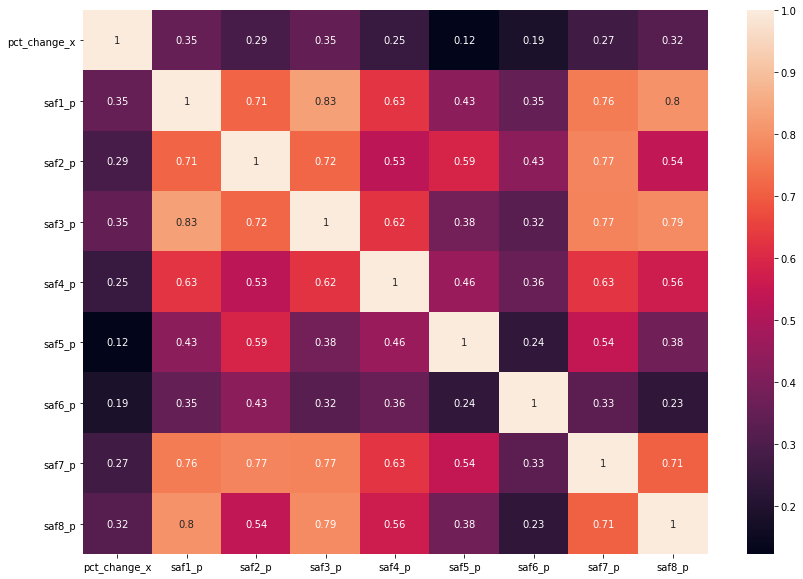

In [10]:
fig, axs = plt.subplots(1, figsize=(14, 10))
combined = combined[['pct_change_x','saf1_p','saf2_p','saf3_p','saf4_p','saf5_p','saf6_p','saf7_p','saf8_p']]
sns.heatmap(combined.corr(), annot = True)

In [11]:
combined.head(5)

,pct_change_x,saf1_p,saf2_p,saf3_p,saf4_p,saf5_p,saf6_p,saf7_p,saf8_p
0,0.005822,0.088968,0.149425,-0.308642,-0.350000,0.636364,0.740000,-0.026371,0.020979
1,-0.063676,0.088235,0.020000,0.160714,0.692308,-0.305556,0.022989,-0.076978,-0.095890
2,-0.024730,-0.618619,-0.539216,-0.615385,-0.568182,-0.320000,-0.561798,-0.494981,-0.537879
3,0.008895,0.088968,0.149425,-0.308642,-0.350000,0.636364,0.740000,-0.026371,0.020979
4,-0.017632,0.088235,0.020000,0.160714,0.692308,-0.305556,0.022989,-0.076978,-0.095890


In [12]:
std_scaler = StandardScaler()

for column in ['pct_change_x', 'saf1_p','saf2_p','saf3_p','saf4_p','saf5_p','saf6_p','saf7_p','saf8_p']:
    combined[column] = std_scaler.fit_transform(combined[column].values.reshape(-1,1))

combined_v2 = combined[['pct_change_x','saf1_p','saf2_p','saf3_p','saf4_p','saf5_p','saf6_p','saf7_p','saf8_p']]


In [13]:
combined.dropna(inplace = True)

C:\Users\ls\Anaconda3\envs\tensor20\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
combined

,pct_change_x,saf1_p,saf2_p,saf3_p,saf4_p,saf5_p,saf6_p,saf7_p,saf8_p
0,0.005822,0.088968,0.149425,-0.308642,-0.350000,0.636364,0.740000,-0.026371,0.020979
1,-0.063676,0.088235,0.020000,0.160714,0.692308,-0.305556,0.022989,-0.076978,-0.095890
2,-0.024730,-0.618619,-0.539216,-0.615385,-0.568182,-0.320000,-0.561798,-0.494981,-0.537879
3,0.008895,0.088968,0.149425,-0.308642,-0.350000,0.636364,0.740000,-0.026371,0.020979
4,-0.017632,0.088235,0.020000,0.160714,0.692308,-0.305556,0.022989,-0.076978,-0.095890
...,...,...,...,...,...,...,...,...,...
11990,-0.046387,-0.603774,-0.525000,-0.606557,0.000000,-0.750000,1.500000,-0.575563,-0.608696
11992,0.001912,0.472222,0.428571,-0.164384,0.000000,3.000000,1.000000,0.234127,0.243243
11993,-0.059160,-0.603774,-0.525000,-0.606557,0.000000,-0.750000,1.500000,-0.575563,-0.608696
11995,0.054348,0.472222,0.428571,-0.164384,0.000000,3.000000,1.000000,0.234127,0.243243


In [15]:
X_train, X_test, y_train, y_test = train_test_split(combined.drop('pct_change_x',axis=1), 
                                                    combined['pct_change_x'], test_size=0.30, 
                                                    random_state=100)

In [16]:
model_score = pd.DataFrame(columns=('r2', 'rmse'))

In [17]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

For the linear regressor, the root mean square error for the testing set is: 0.04807863313444244
The r2 score for the testing set is: 0.22721538919005313


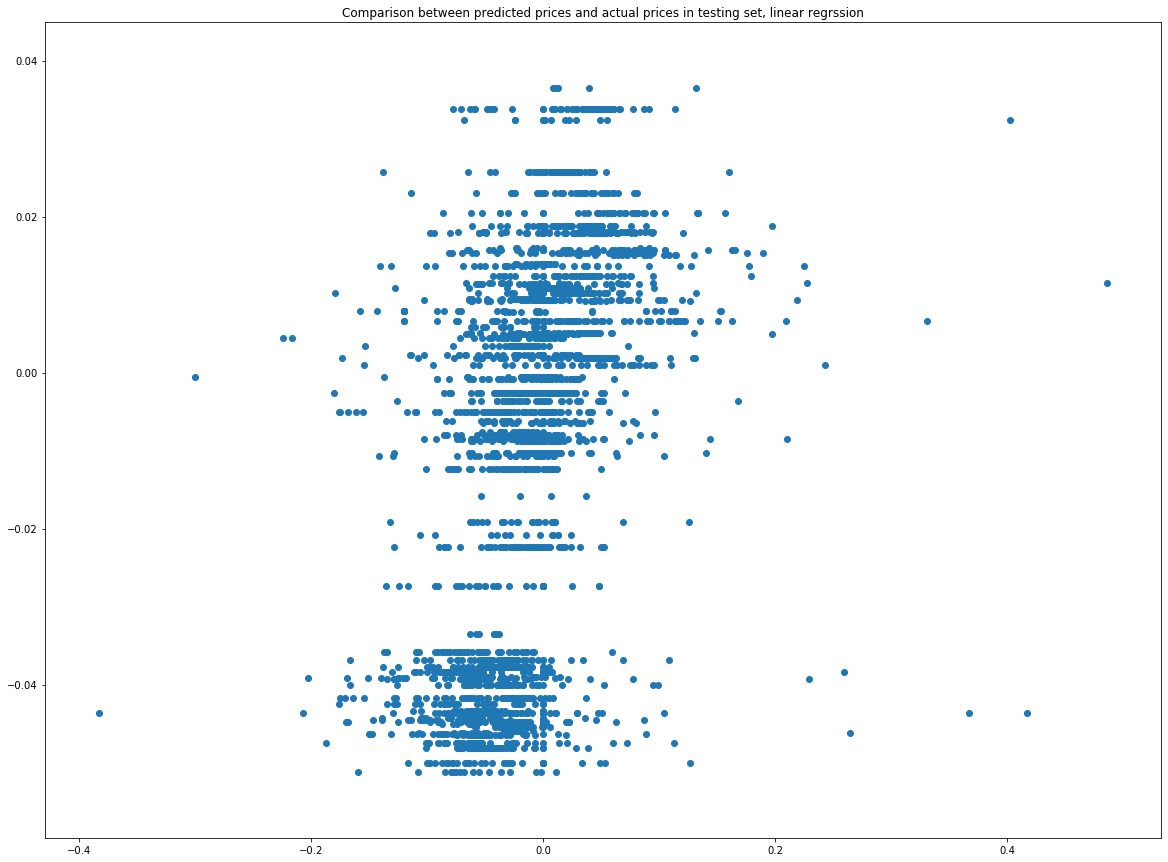

In [18]:
lr_predict = lrmodel.predict(X_test)

lr_r2 = metrics.r2_score(y_test, lr_predict)
lr_rmse = math.sqrt(metrics.mean_squared_error(y_test, lr_predict))

model_score = model_score.append(pd.DataFrame({'r2':[lr_r2], 'rmse':[lr_rmse]}, index = ['Linear Regression']))

print('For the linear regressor, the root mean square error for the testing set is:', lr_rmse)
print('The r2 score for the testing set is:', lr_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, linear regrssion')
plt.scatter(y_test, lr_predict)

For the linear regressor, the root mean square error for the training set is: 0.0659444769596976
The r2 score for the testing set is: 0.1212310736853639


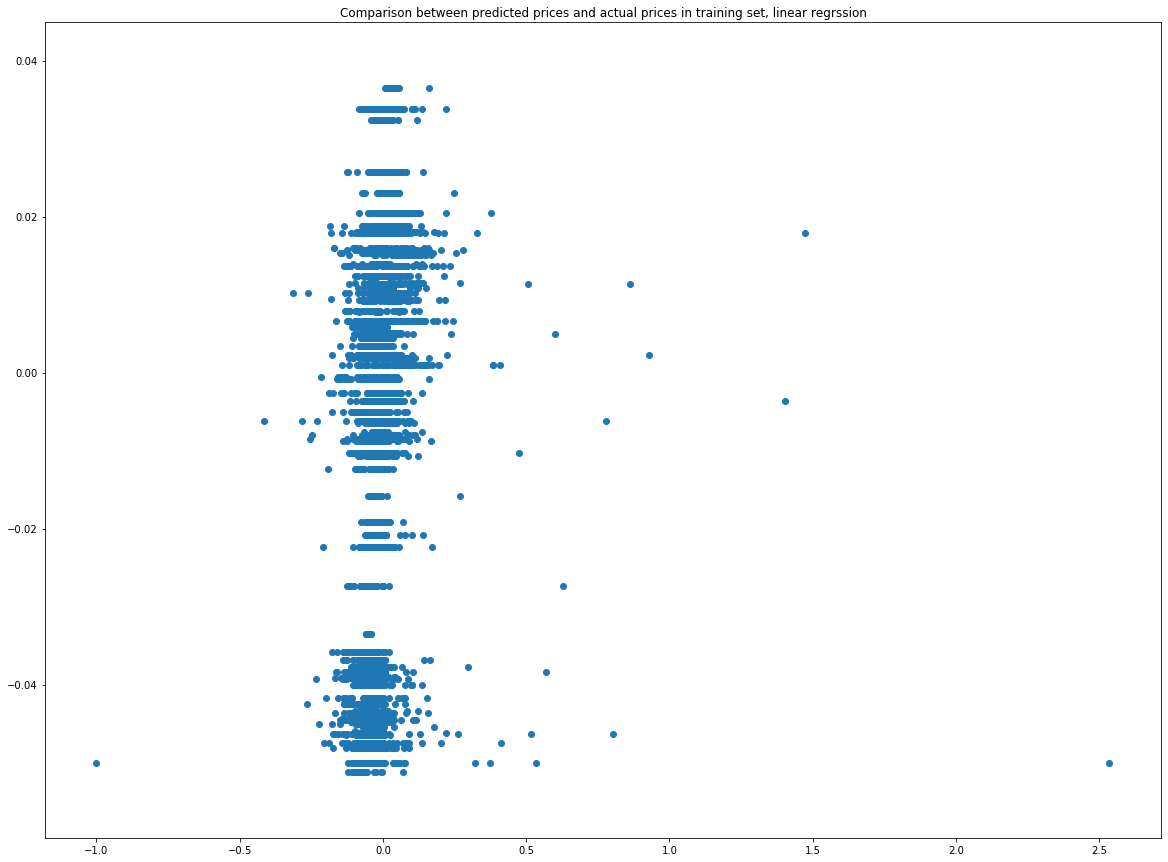

In [19]:
lr_predict_train = lrmodel.predict(X_train)

lr_r2_train = metrics.r2_score(y_train, lr_predict_train)
lr_rmse_train = math.sqrt(metrics.mean_squared_error(y_train, lr_predict_train))

print('For the linear regressor, the root mean square error for the training set is:', lr_rmse_train)
print('The r2 score for the testing set is:', lr_r2_train)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in training set, linear regrssion')
plt.scatter(y_train, lr_predict_train)

For the Lasso linear regressor, the root mean square error for the testing set is: 0.048155353509847044
The r2 score for the testing set is: 0.2247471147998622


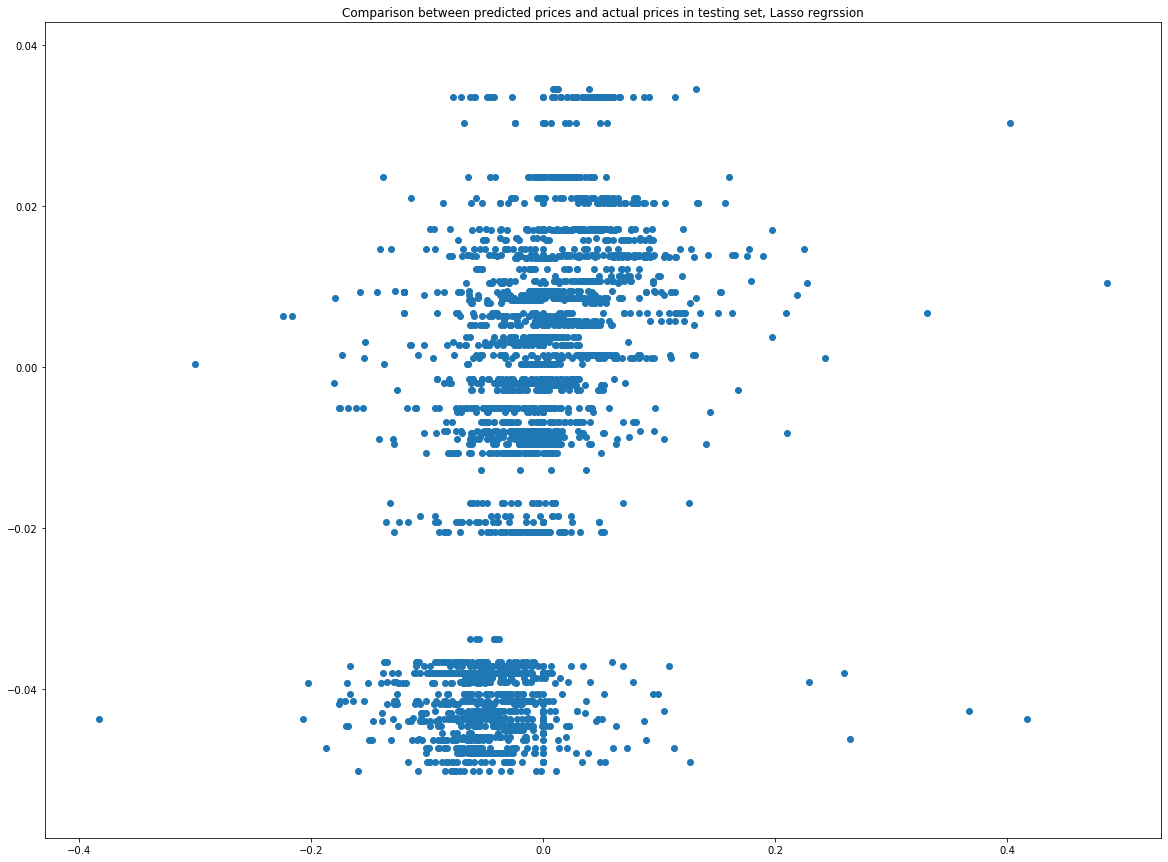

In [20]:
alphas = np.logspace(-4,4,12)
lasso = LassoCV(max_iter=10**6, alphas=alphas)
lasso.fit(X_train, y_train)

lasso_predict = lasso.predict(X_test)

lasso_r2 = metrics.r2_score(y_test, lasso_predict)
lasso_rmse = math.sqrt(metrics.mean_squared_error(y_test, lasso_predict))

model_score = model_score.append(pd.DataFrame({'r2':[lasso_r2], 'rmse':[lasso_rmse]}, index = ['Lasso Regression']))

print('For the Lasso linear regressor, the root mean square error for the testing set is:', lasso_rmse)
print('The r2 score for the testing set is:', lasso_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, Lasso regrssion')
plt.scatter(y_test, lasso_predict)

In [21]:
X_train.shape

(7788, 8)

In [22]:
#callback = callbacks.EarlyStopping(monitor='loss', patience=3)
nn_model = Sequential()
nn_model.add(Dense(input_dim = X_train.shape[1], units = 30, activation = 'relu'))
#nn_model.add(Dropout(0.3))
nn_model.add(Dense(units = 30, activation = 'relu'))
nn_model.add(Dense(units=1))
nn_model.compile(loss='mean_squared_error', optimizer = 'adam', metrics=['mse'])

In [23]:
#nn_model.fit(X_train, y_train, batch_size=5000, epochs=800, callbacks=[callback])
nn_model.fit(X_train, y_train, batch_size=30, epochs=50)

Train on 7788 samples
Epoch 1/50
7788/7788 [==============================] - 1s 181us/sample - loss: 0.0098 - mse: 0.0098
Epoch 2/50
7788/7788 [==============================] - 1s 113us/sample - loss: 0.0043 - mse: 0.0043
Epoch 3/50
7788/7788 [==============================] - 1s 113us/sample - loss: 0.0043 - mse: 0.0043
Epoch 4/50
7788/7788 [==============================] - 1s 111us/sample - loss: 0.0042 - mse: 0.0042
Epoch 5/50
7788/7788 [==============================] - 1s 109us/sample - loss: 0.0043 - mse: 0.0043
Epoch 6/50
7788/7788 [==============================] - 1s 112us/sample - loss: 0.0043 - mse: 0.0043
Epoch 7/50
7788/7788 [==============================] - 1s 113us/sample - loss: 0.0043 - mse: 0.0043
Epoch 8/50
7788/7788 [==============================] - 1s 113us/sample - loss: 0.0043 - mse: 0.0043
Epoch 9/50
7788/7788 [==============================] - 1s 109us/sample - loss: 0.0043 - mse: 0.0043
Epoch 10/50
7788/7788 [==============================] - 1s 112us/sam

For the MLP model, the root mean square error for the testing set is: 0.04623582295602345
The r2 score for the testing set is: 0.2853203359102997


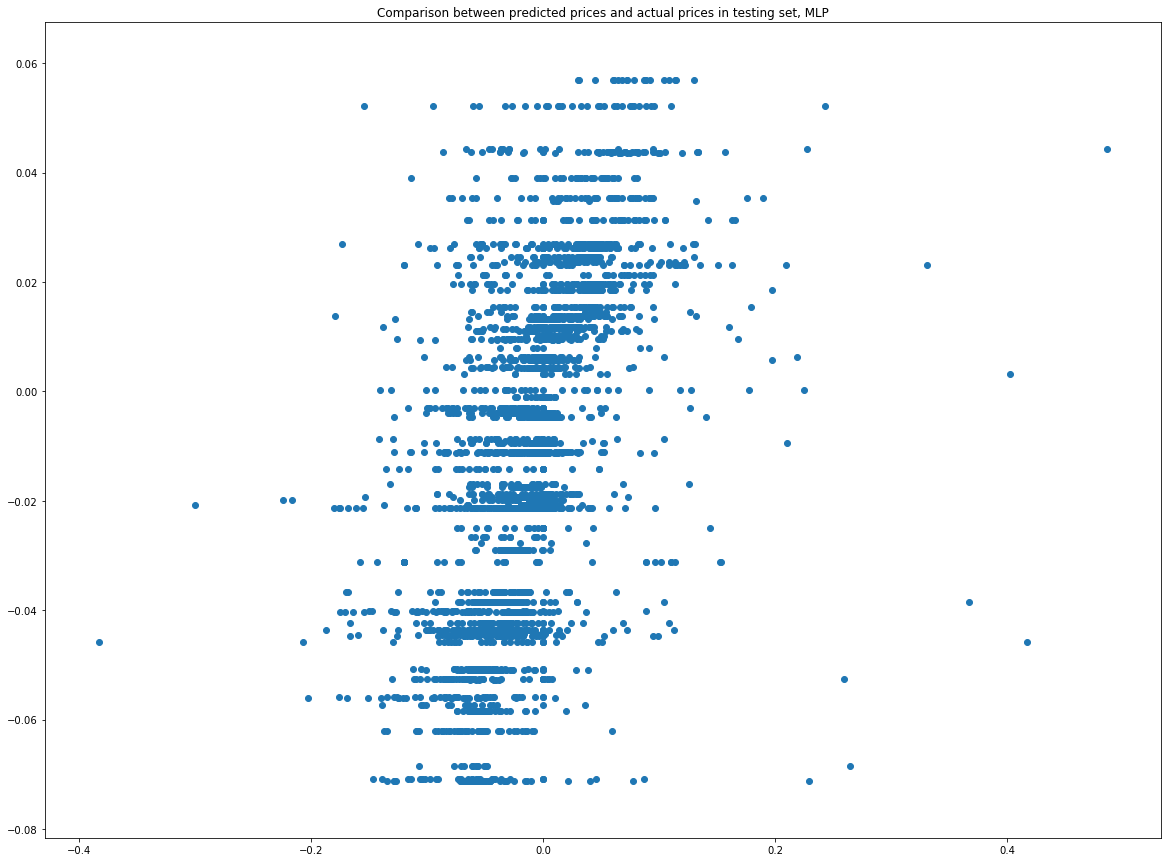

In [24]:
nn_predict = nn_model.predict(X_test)

nn_rmse = math.sqrt(metrics.mean_squared_error(y_test, nn_predict))
nn_r2 = metrics.r2_score(y_test, nn_predict)

model_score = model_score.append(pd.DataFrame({'r2':[nn_r2], 'rmse':[nn_rmse]}, index = ['MLP']))

print('For the MLP model, the root mean square error for the testing set is:', nn_rmse)
print('The r2 score for the testing set is:', nn_r2)

fig, ax = plt.subplots(figsize=(20,15))
ax.set_title('Comparison between predicted prices and actual prices in testing set, MLP')
plt.scatter(y_test, nn_predict)

In [25]:
knnReg = KNeighborsRegressor()

param_grid = [
     {
         'weights':['uniform'],
         'n_neighbors':[i for i in range(1,10)]
     }]

grid_search_knn = GridSearchCV(knnReg, param_grid,n_jobs=-1,verbose=2)
grid_search_knn.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'weights': ['uniform']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [26]:
knn_best = grid_search_knn.best_estimator_
knn_best

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

For the K-NN regressor, the root mean square error for the testing set is: 0.056186327364786376
The r2 score for the testing set is: -0.05539621160272623


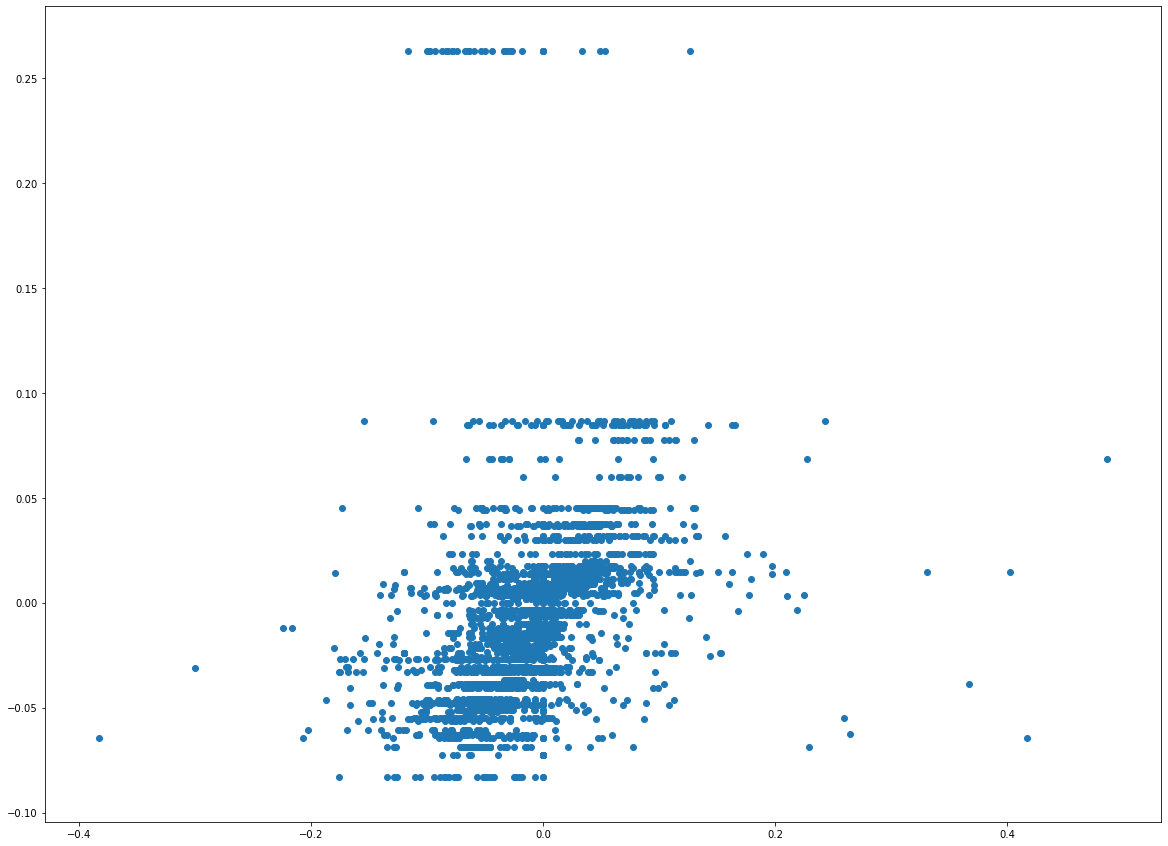

In [27]:
knn_predict = knn_best.predict(X_test)

knn_r2 = metrics.r2_score(y_test, knn_predict)
knn_rmse = math.sqrt(metrics.mean_squared_error(y_test, knn_predict))

model_score = model_score.append(pd.DataFrame({'r2':[knn_r2], 'rmse':[knn_rmse]}, index = ['K - Nearest Neighbor']))

print('For the K-NN regressor, the root mean square error for the testing set is:', knn_rmse)
print('The r2 score for the testing set is:', knn_r2)
fig, ax = plt.subplots(figsize=(20,15))
plt.scatter(y_test, knn_predict)